In [1]:
# Importing dependencies:
import cv2
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print('Imported all dependencies!')

Imported all dependencies!


This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


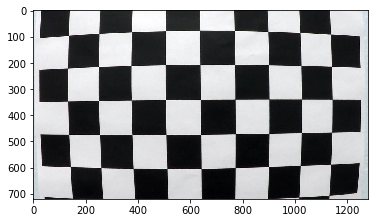

In [2]:
# Opening and reading an image (one provided by Udacity):
image = cv2.imread('camera_cal/calibration1.jpg')

# Importing several images for testing:
images = glob.glob('camera_cal/*.jpg')

print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

In [5]:
# Setting image size:
# Number of inside corners in X:
nx = 9
# Number of inside corners in Y:
ny = 6

# Creating object points:
# Array that will hold 3D points of the real world:
objpoints = []

# Array that will hold 2D in the image plane:
imagepoints = []

# Preparing the object points:
objp = np.zeros((6 * 9, 3), np.float32)

# Reshaping the coordinates given from ngrid to 2 columns X & Y:
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

print('Done setting the arrays and image size!')

Done setting the arrays and image size!


In [6]:
# Creating function that find the points in the images:
def find_points(img, objpoints, imagepoints):
    
    # Iterating through the images found in the folder:
    for idx, fname in enumerate(images):
        
        # Saving the images into an empty variable:
        img = cv2.imread(fname)
    
        # Grayscaling images from color to gray:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Looking for chess board corners:
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        # Drawing detected corners of. the image:
        img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)

        # If the function finds corners:
        if ret == True:

            # Appending the corners and the object points to the empty arrays created before:
            imagepoints.append(corners)
            objpoints.append(objp)

            # Drawing corners on the chessboard:
            cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        
    return img

print('Function is ready to use!')

Function is ready to use!


Image saved in directory!


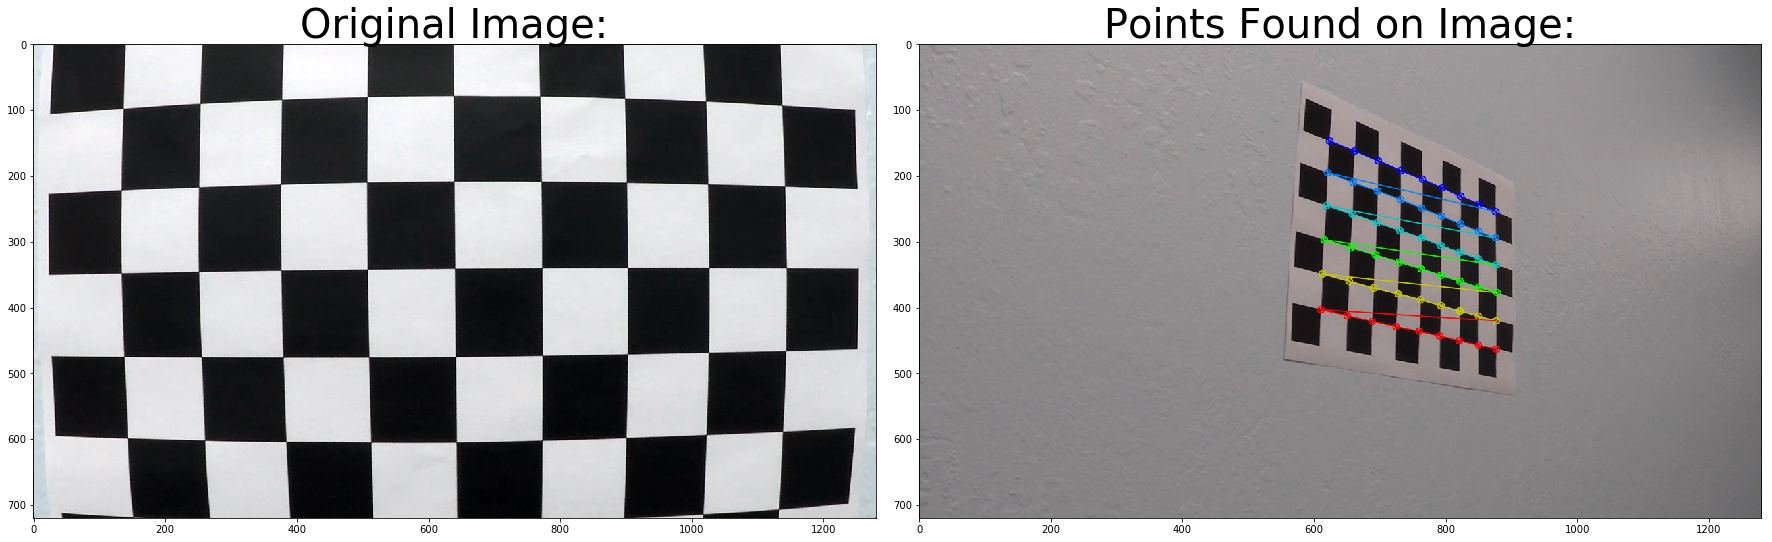

In [7]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Showing the original image before passing it through the function:
ax1.imshow(image)
ax1.set_title('Original Image:', fontsize=40)

# Saving the found points image and saving in a variable and folder:
image_points = find_points(image, objpoints, imagepoints)
plt.imsave('output_images/image_points.jpg', image_points)
print('Image saved in directory!')

# Showing the calibrated picture after passing it through the function:
ax2.imshow(image_points)
ax2.set_title('Points Found on Image:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [10]:
# Calibrating and undistorting the images:
def undistort_img(img):

    # Test undistortion on an image:
    img_size = (image.shape[1], image.shape[0])

    # Do camera calibration given object points and image points:
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imagepoints, img_size, None, None)

    # Creating the destination of the undistorted image:
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
    # Save the camera calibration result for later use (we won't worry about rvecs / tvecs):
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
    pickle.dump(dist_pickle, open("camera_cal/wide_dist_pickle.p", "wb"))
    
    return dst

print('Function ready to use!')

Function ready to use!


Image saved in directory!


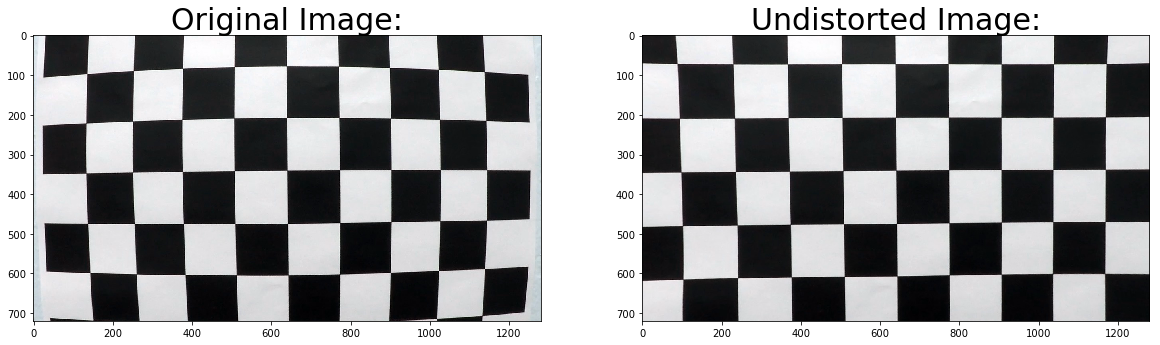

In [11]:
# Showing the original image before passing it through the function:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image:', fontsize=30)

# Saving the found points image and saving in a variable and folder:
undistort_image = undistort_img(image)
plt.imsave('output_images/undistort_image.jpg', undistort_image)
print('Image saved in directory!')

# Showing the undistorted picture after passing it through the function:
ax2.imshow(undistort_image)
ax2.set_title('Undistorted Image:', fontsize=30)

In [12]:
# Creating a function that applies Sobel:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Converting image to grayscale:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Taking the derivate of X & Y:
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # Taking the absolute value of the derivative of the gradients.
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    
    # Scaling the image to 8-bit (0-255) and converting to np.uint8
    scaled_model = np.uint8(255 * abs_sobelx / np.max(abs_sobelx))
    
    # Creating a mask of 1s where the scaled gradient magnitude number is < thresh min and > the thresh max:
    sxbinary = np.zeros_like(scaled_model)
    sxbinary[(scaled_model >= thresh_min) & (scaled_model <= thresh_max)] = 1
    
    # Creating variable to save sxbinary:
    binary_output = sxbinary
    
    return binary_output

print('Function ready to use!')

Function ready to use!


Image saved in directory!


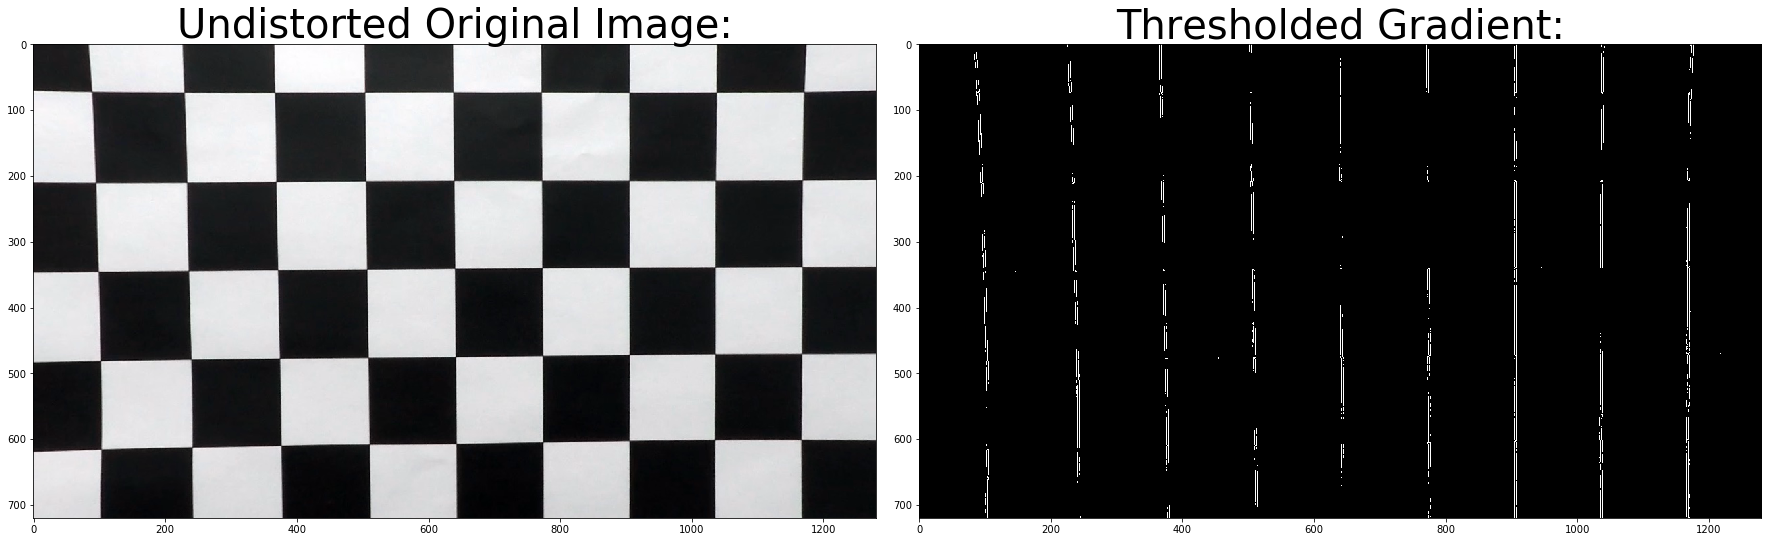

In [20]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Showing the original image before passing it through the function:
ax1.imshow(undistort_image)
ax1.set_title('Undistorted Original Image:', fontsize=40)

# Saving the thresholded gradient and saving in a variable and folder:
thresholded_image = abs_sobel_thresh(undistort_image, orient='x', thresh_min=20, thresh_max=100)
plt.imsave('output_images/thresholded_image.jpg', thresholded_image)
print('Image saved in directory!')

# Showing the thresholded gradient after passing it through the function:
ax2.imshow(thresholded_image, cmap='gray')
ax2.set_title('Thresholded Gradient:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Image saved in directory!


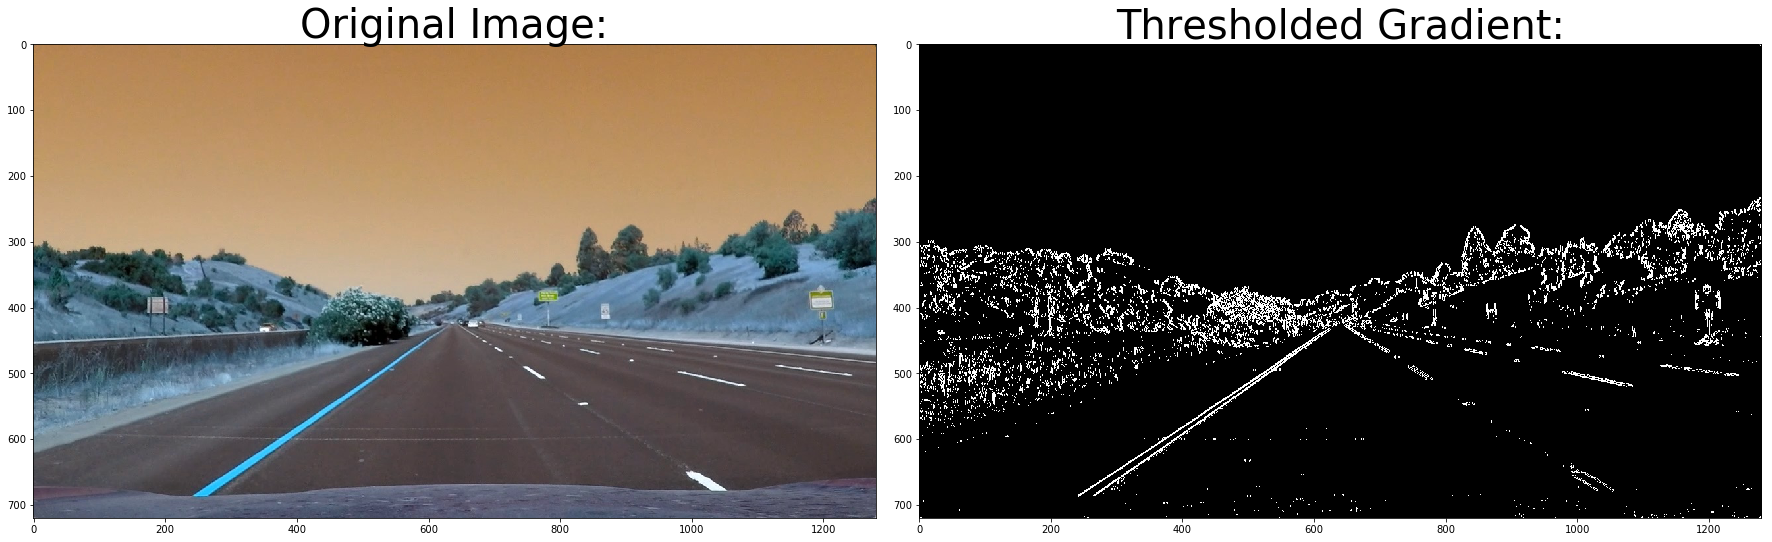

In [17]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

highway_test1 = cv2.imread('test_images/straight_lines1.jpg')

# Displaying threshold in highway picture:
# Showing the original image before passing it through the function:
ax1.imshow(highway_test1)
ax1.set_title('Original Image:', fontsize=40)

# Saving the thresholded gradient and saving in a variable and folder:
highway_threshold_test1 = abs_sobel_thresh(highway_test1, orient='x', thresh_min=20, thresh_max=100)
plt.imsave('output_images/highway_threshold_test1.jpg', highway_threshold_test1)
print('Image saved in directory!')

# Showing the thresholded gradient after passing it through the function:
ax2.imshow(highway_threshold_test1, cmap='gray')
ax2.set_title('Thresholded Gradient:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [25]:
# Creating function that applies Magnitude of Gradient:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Converting image to grayscale:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Taking the derivate of X & Y:
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # Calculating the magnitude:
    abs_sobelx = np.sqrt(sobelx**2 + sobely**2)
    
    # Scaling the image to 8-bit (0-255) and converting to np.uint8
    scaled_model = np.uint8(255 * abs_sobelx / np.max(abs_sobelx))
    
    # Creating a mask of 1s where the scaled gradient magnitude number is < thresh min and > the thresh max:
    sxbinary = np.zeros_like(scaled_model)
    sxbinary[(scaled_model > mag_thresh[0]) & (scaled_model < mag_thresh[1])] = 1
    
    # Creating variable to save sxbinary:
    binary_output = sxbinary
    return binary_output
    
print('Function ready to use!')

Function ready to use!


Image saved in directory!


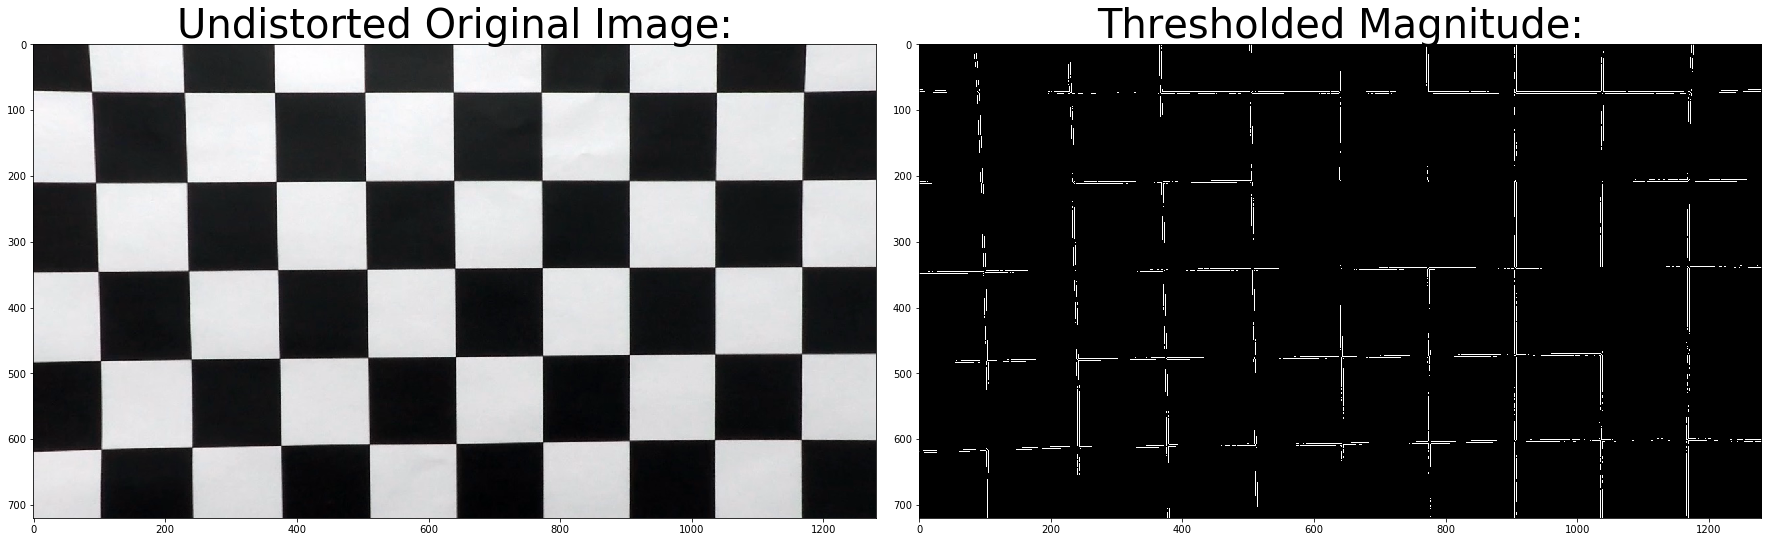

In [26]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Showing the original image before passing it through the function:
ax1.imshow(undistort_image)
ax1.set_title('Undistorted Original Image:', fontsize=40)

# Saving the thresholded gradient and saving in a variable and folder:
magnitude_image = mag_thresh(undistort_image, sobel_kernel=3, mag_thresh=(30, 100))
plt.imsave('output_images/magnitude_image.jpg', magnitude_image)
print('Image saved in directory!')

# Showing the thresholded gradient after passing it through the function:
ax2.imshow(magnitude_image, cmap='gray')
ax2.set_title('Thresholded Magnitude:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Image saved in directory!


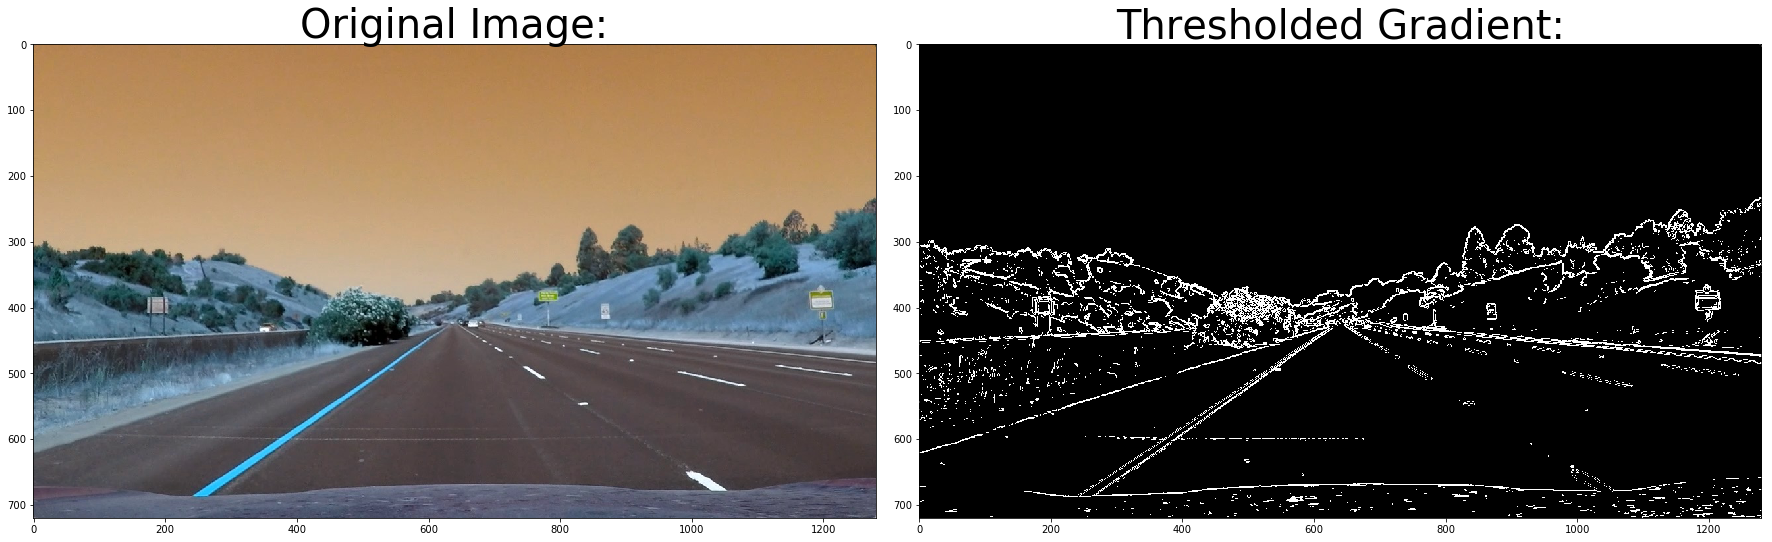

In [29]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Displaying magnitude threshold in highway picture:
# Showing the original image before passing it through the function:
ax1.imshow(highway_test1)
ax1.set_title('Original Image:', fontsize=40)

# Saving the magnitude thresholded and saving in a variable and folder:
highway_magnitude_test1 = mag_thresh(highway_test1, sobel_kernel=3, mag_thresh=(30, 100))
plt.imsave('output_images/highway_magnitude_test1.jpg', highway_magnitude_test1)
print('Image saved in directory!')

# Showing the magnitude thresholded after passing it through the function:
ax2.imshow(highway_magnitude_test1, cmap='gray')
ax2.set_title('Thresholded Gradient:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
# Creating the function direction of the gradient:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Converting image to grayscale:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Taking the derivate of X & Y:
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # Calculating the magnitude:
    abs_sobelx = np.sqrt(sobelx**2 + sobely**2)
    
    # Scaling the image to 8-bit (0-255) and converting to np.uint8
    scaled_model = np.uint8(255 * abs_sobelx / np.max(abs_sobelx))
    
    # Creating a mask of 1s where the scaled gradient magnitude number is < thresh min and > the thresh max:
    sxbinary = np.zeros_like(scaled_model)
    sxbinary[(scaled_model > mag_thresh[0]) & (scaled_model < mag_thresh[1])] = 1
    
    # Creating variable to save sxbinary:
    binary_output = sxbinary
    return binary_output
    
print('Function ready to use!')